In [ ]:
# -*- coding: utf-8 -*-
"""
Spyder Editor

This is a temporary script file.
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

#Data loading and missing value detection

df=pd.read_csv('data.csv')
print(df.head)
print(df.isnull().sum())
print(df.head)

#Spliting the datasets into training and testing

y=df["diagnosis"]
x=df.iloc[:,2:11]

y_train=y[:560]
x_train=x[:560]

x_test=x[560:]
y_test=y[560:]

#KNN Classifier for Classification

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


accuracy=[]
neighbors=range(1,52,2)


for i in range(1,52,2):
    knn_clf=KNeighborsClassifier(n_neighbors=i)
    knn_clf.fit(x_train,y_train)
    y_predict=knn_clf.predict(x_test)
    accuracy.append(accuracy_score(y_test,y_predict))


#Checking for best neighbour
 
plt.plot(neighbors,accuracy,color='green',marker='o',linestyle='solid')
plt.ylabel("Accuracy")
plt.xlabel("Neighbors")
plt.title("Neighbors vs. Accuracy")
plt.show()

##From linegraph the best number for neighbors in n=15.

##SUPPORT VECTOR MACHINES:

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
import numpy as np

accuracysvm=[]
cvalue=np.arange(0.1, 100.1, 10.0)

for i in np.arange(0.1, 100.1, 10.0):
 svm_clf=Pipeline((
        ("scaler",StandardScaler()),("linear_svc",LinearSVC(C=i,loss="hinge"))    
                        ))
 svm_clf.fit(x_train,y_train)
 y_predict=svm_clf.predict(x_test)
 accuracysvm.append(accuracy_score(y_test,y_predict))


plt.plot(accuracysvm,cvalue,color='red',marker='o',linestyle='solid')
plt.ylabel("C-Value")
plt.xlabel("Accuracy")
plt.title("C-Value vs. Accuracy, SVM")
plt.show()
    
##SUPPORT VECTOR MACHINES with Cross Validation:

accuracysvm1=[]
cvalue1=np.arange(0.1, 100.1, 1.0)
for i in np.arange(0.1, 100.1, 1.0):
 svm_clf=Pipeline((
        ("scaler",StandardScaler()),("linear_svc",LinearSVC(C=i,loss="hinge"))    
                        ))
 accuracysvm1.append(cross_val_score(svm_clf,x_train,y_train,cv=2,scoring="accuracy"))

plt.plot(accuracysvm1,cvalue1,color='red',marker='o',linestyle='solid')
plt.ylabel("C-Value Cross-Validation")
plt.xlabel("Accuracy Cross-Validation")
plt.title("C-Value vs. Accuracy, Cross-Validation-SVM")
plt.show()   


##SUPPORT VECTOR MACHINES with Polynomial:

from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

accuracysvm2=[]
cvalue2=np.arange(0,11,1)


for p in np.arange(0, 11, 1):
  polynomial_svm_clf=Pipeline((
      ("scaler",StandardScaler()),("svm_clf",SVC(kernel="poly",degree=p,coef0=1,C=1000))
      ))
  polynomial_svm_clf.fit(x_train,y_train)
  y_predictpsvm=polynomial_svm_clf.predict(x_test)
  accuracysvm2.append(accuracy_score(y_test,y_predictpsvm))
   

plt.plot(accuracysvm2,cvalue2,color='red',marker='o',linestyle='solid')
plt.ylabel("C-Value SVM Polynomial")
plt.xlabel("Accuracy SVM Polynomial")
plt.title("C-Value vs. Accuracy, SVM Polynomial")
plt.show()

##SUPPORT VECTOR MACHINES with Polynomial Constant and changing c-value:

accuracysvm2=[]
cvalue2=np.arange(0,11,1),

for i in np.arange(0.1, 1000.1, 10.1):
  polynomial_svm_clf=Pipeline((
      ("scaler",StandardScaler()),("svm_clf",SVC(kernel="poly",degree=3,coef0=1,C=i))
      ))
  polynomial_svm_clf.fit(x_train,y_train)
  y_predictpsvm=polynomial_svm_clf.predict(x_test)
  accuracysvm2.append(accuracy_score(y_test,y_predictpsvm))
  
plt.plot(accuracysvm2,cvalue2,color='red',marker='o',linestyle='solid')
plt.ylabel("C-Value SVM Polynomial")
plt.xlabel("Accuracy SVM Polynomial")
plt.title("C-Value vs. Accuracy, SVM Polynomial")
plt.show()



##SUPPORT VECTOR MACHINES with Gaussian RBF Kernel:

accuracysvm2=[]
gamma=np.arange(0.1,11,1)

for i in np.arange(0.1,11,1):
  rbf_kernel_svm_clf=Pipeline((("scaler",StandardScaler()),("svm_clf",SVC(kernel="rbf",gamma=i,C=1000))))
  rbf_kernel_svm_clf.fit(x_train,y_train)
  y_predictpsvm=polynomial_svm_clf.predict(x_test)
  accuracysvm2.append(accuracy_score(y_test,y_predictpsvm))
  
plt.plot(accuracysvm2,gamma,color='red',marker='o',linestyle='solid')
plt.ylabel("Gamma SVM  Gaussian")
plt.xlabel("Accuracy SVM Gaussian")
plt.title("Gamma vs. Accuracy, SVM Gaussian")
plt.show()


##Decision Trees using Cross-Validation:

from sklearn.tree import DecisionTreeClassifier
accuracydt=[]
max_depth=np.arange(1,11,1)

for i in np.arange(1,11,1):
  tree_clf=DecisionTreeClassifier(max_depth=i)
  accuracydt.append(cross_val_score(tree_clf,x_train,y_train,cv=2,scoring="accuracy"))

plt.plot(accuracydt,max_depth,color='red',marker='o',linestyle='solid')
plt.ylabel("Max_Depth")
plt.xlabel("Accuracy")
plt.title("Accuracy Vs. Decision Tree, Decision Tree")
plt.show()


##CHECKING CORRELATION BETWEEN VARIABLES:


from scipy.stats import pearsonr


corr, _ = pearsonr(df["radius_mean"], df["texture_mean"])
print('Pearsons correlation Radius,Texture: %.3f' % corr)

corr, _ = pearsonr(df["radius_mean"], df["perimeter_mean"])
print('Pearsons correlation Radius,Perimeter: %.3f' % corr)

corr, _ = pearsonr(df["radius_mean"], df["area_mean"])
print('Pearsons correlation Radius,Perimeter: %.3f' % corr)

corr, _ = pearsonr(df["radius_mean"], df["smoothness_mean"])
print('Pearsons correlation Radius,Perimeter: %.3f' % corr)

corr, _ = pearsonr(df["radius_mean"], df["compactness_mean"])
print('Pearsons correlation Radius,Perimeter: %.3f' % corr)

corr, _ = pearsonr(df["radius_mean"], df["concavity_mean"])
print('Pearsons correlation Radius,Perimeter: %.3f' % corr)

corr, _ = pearsonr(df["radius_mean"], df["concave points_mean"])
print('Pearsons correlation Radius,Perimeter: %.3f' % corr)

corr, _ = pearsonr(df["radius_mean"], df["symmetry_mean"])
print('Pearsons correlation Radius,Perimeter: %.3f' % corr)

corr, _ = pearsonr(df["radius_mean"], df["fractal_dimension_mean"])
print('Pearsons correlation Radius,Perimeter: %.3f' % corr)

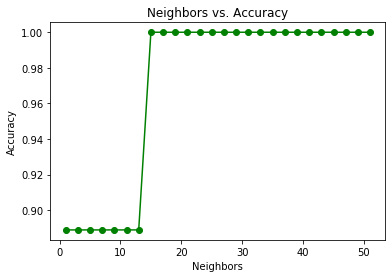
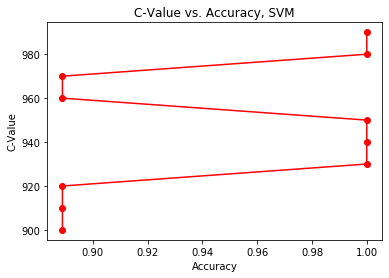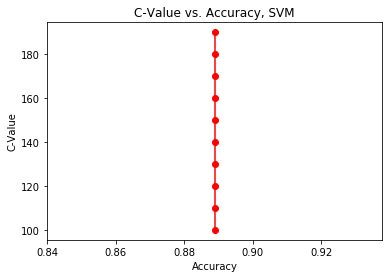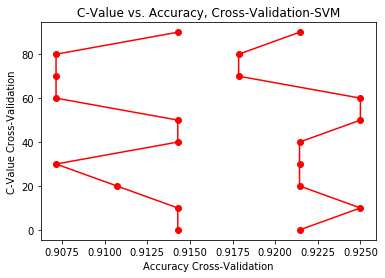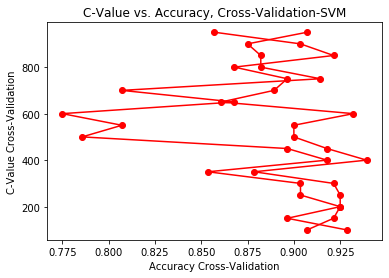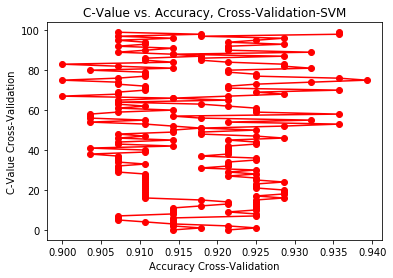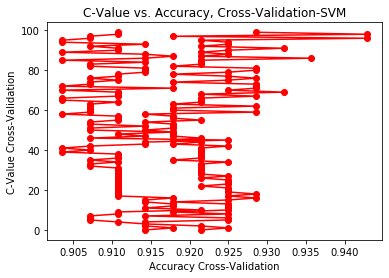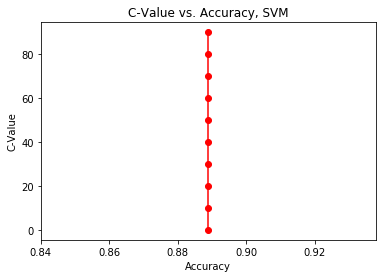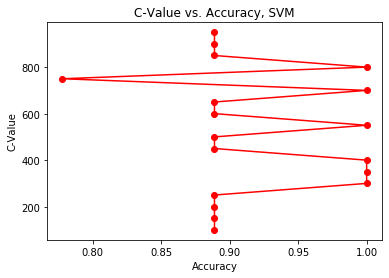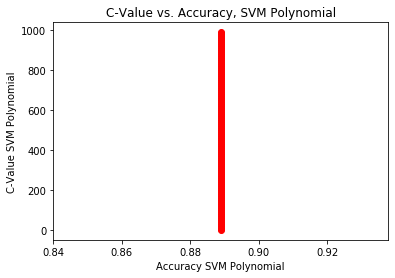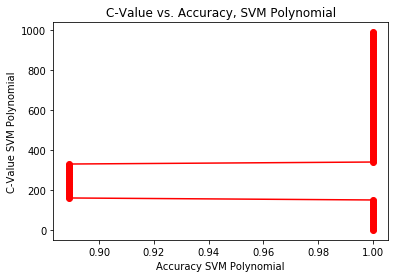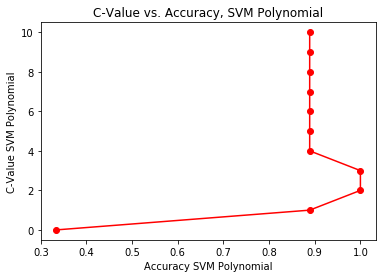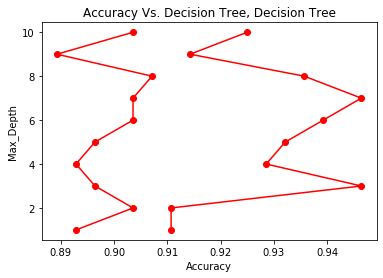